In [2]:
%run preamble.py
%matplotlib inline

# An Over-determined System

### What if I have more points than variables?

e.g. $(-3.1,4.2)$, $(-2.1,2.4)$, $(1.8,-2.5)$, $(0.5,-1.3)$, $(-1.1,1.9)$

Consider that this is often the case in data science. We generally refer to the number of instances or points as $n$ and the number of features as $p$. Here we have $n > p$. A system with more $n$ than $p$ is known as an **over-determined system**.

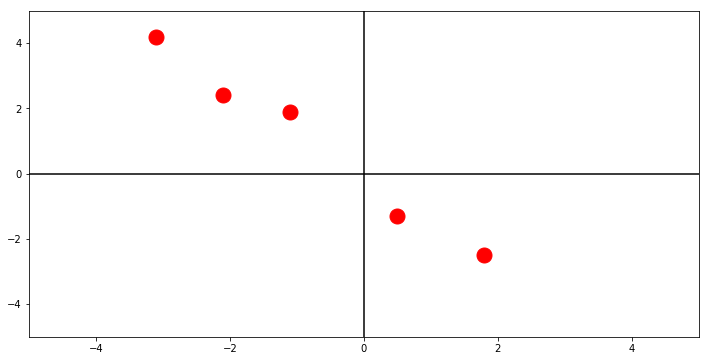

In [3]:
fig = initialize_2d_plot(-5,5,-5,5)
plt.plot(-3.1,4.2,'o',c='red', markersize=15)
plt.plot(-2.1,2.4,'o',c='red', markersize=15)
plt.plot(1.8,-2.5,'o',c='red', markersize=15)
plt.plot(0.5,-1.3,'o',c='red', markersize=15)
plt.plot(-1.1,1.9,'o',c='red', markersize=15)

### There is no line that will work!!!

### What we want is the "best" line

Our problem could be defined as such

Given $(-3.1,4.2)$, $(-2.1,2.4)$, $(1.8,-2.5)$, $(0.5,-1.3)$, $(-1.1,1.9)$, we seek $\beta_0$ and $\beta_1$ so that

$$
\left(\begin{matrix}1&-3.1\\1&-2.1\\1&1.8\\1&0.5\\1&-1.1\end{matrix}\right)
\left(\begin{matrix}\beta_0\\\beta_1\end{matrix}\right)=\left(\begin{matrix}4.2\\2.4\\-2.5\\-1.3\\1.9\end{matrix}\right)$$

$$X\beta=\mathbf{y}$$ 

This implies that

$$\beta=X^{-1}\mathbf{y}$$

### Let's Solve it with Python

We will solve it exactly as previously. 

In [4]:
X = np.array([(1,-3.1),(1,-2.1),(1,1.8),(1,0.5),(1,-1.1)])
y = np.array((4.2,2.4,-2.5,-1.3,1.9))

In [5]:
beta = inverse(X).dot(y)

LinAlgError: Last 2 dimensions of the array must be square

In [ ]:
inverse(X)

## $X$ has no inverse!!!

While the precise mathematical meaning of this may elude you, intuitively, you should be able to understand why. We framed the problem as such 

Given $(-3.1,4.2)$, $(-2.1,2.4)$, $(1.8,-2.5)$, $(0.5,-1.3)$, $(-1.1,1.9)$, we seek $\beta_0$ and $\beta_1$ so that

$$
\left(\begin{matrix}1&-3.1\\1&-2.1\\1&1.8\\1&0.5\\1&-1.1\end{matrix}\right)
\left(\begin{matrix}\beta_0\\\beta_1\end{matrix}\right)=\left(\begin{matrix}4.2\\2.4\\-2.5\\-1.3\\1.9\end{matrix}\right)$$

$$X\beta=\mathbf{y}$$

But there can be no solution to this system of equations. There is no vector $\beta = (\beta_0, \beta_1)$ that will work for all five equations. 

If we are going to solve this, we will need to reframe the problem.

### Can't we find a non-linear solution

##### Non-linear functions are linear in Coefficient!!

Why is this important? Because we want to develop our linearly intuition **even if we will use non-linearity later**.

$$y = \beta_0 + \beta_1x + \beta_2x^2 +  \beta_3x^3$$

$$\left(\begin{matrix}1&x&x^2&x^3\end{matrix}\right)\left(\begin{matrix}\beta_0\\\beta_1\\\beta_2\\\beta_3\end{matrix}\right)=y$$

### When is there no Inverse?

When the matrix is singular. This is deep, deep concept. But basically, it signifies that via elimination a row and/or a column of the matrix can be reduced to a column of zeros. 

This is obviously true for a rectangular matrix ($n>p$ and $p>n$). 


$$\left(\begin{matrix}1&-3.1\\1&-2.1\\1&1.8\\1&0.5\\1&-1.1\end{matrix}\right)=\left(\begin{matrix}1&-3.1&0&0&0\\1&-2.1&0&0&0\\1&1.8&0&0&0\\1&0.5&0&0&0\\1&-1.1&0&0&0\end{matrix}\right)$$

When we use this matrix as a transformer **it will lose information that is unrecoverable**. Thus, when we try to invert, we will have incomplete information and will not be able to.

Intuitively, think of holding a color image in a matrix. What if we apply a matrix transformation to this to transform the image to be black and white. There is no inverse operation to transform the image back into color. **We lost information!!**.

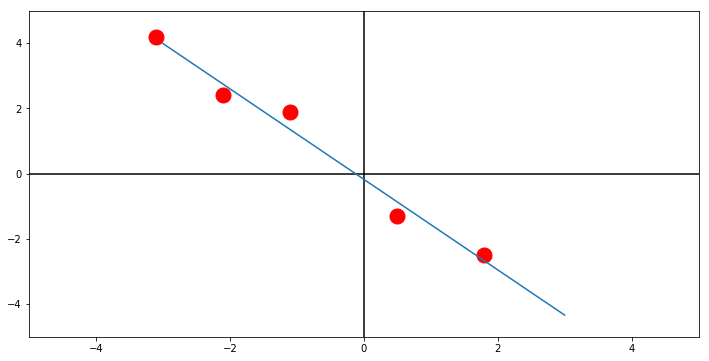

In [6]:
XTX = X.T.dot(X)

XTy = X.T.dot(y)

beta = inverse(XTX).dot(XTy)

fig = initialize_2d_plot(-5,5,-5,5)
plt.plot(-3.1,4.2,'o',c='red', markersize=15)
plt.plot(-2.1,2.4,'o',c='red', markersize=15)
plt.plot(1.8,-2.5,'o',c='red', markersize=15)
plt.plot(0.5,-1.3,'o',c='red', markersize=15)
plt.plot(-1.1,1.9,'o',c='red', markersize=15)
f = lambda x: beta[0] + beta[1]*x
plt.plot(xx, f(xx))